In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
class elm:
    def __init__(self, input_data, nh,lamba2):
        self.input = input_data
        self.hidden_neurons= nh
        self.lambda2 = lamba2
        self.wr = np.random.rand(self.input.shape[1], self.hidden_neurons)
        self.br = np.random.rand(1, self.hidden_neurons)
        
    def sigmoid(self,x):
        return (1 / (1 + np.exp(-x)))
    
    def compute_H(self):
        H_ops = np.matmul(np.transpose(self.wr), np.transpose(self.input)) + np.transpose(self.br)
        H_ops = self.sigmoid(H_ops)
        H_ops = np.transpose(H_ops)
        return H_ops
    
    def w_star(self, H):
        a = np.linalg.inv(np.matmul(np.transpose(H), H) + self.lambda2*np.identity(self.hidden_neurons))
        b = np.matmul(np.transpose(H), self.input)
        Wx = np.matmul(a, b)
        return Wx

    def predict(self):
        wr = self.wr; br = self.br
        H = self.compute_H()
        Wx = self.w_star(H)
        a = np.matmul(np.transpose(wr), np.transpose(self.input))
        b = np.transpose(br); c = self.sigmoid(a + b)
        recons = np.matmul(np.transpose(Wx), c)
        return np.transpose(recons)

In [3]:
# x= np.array([[1,2,3,4,5],[1,2,3,1,6],[0,0,0,1,7], [2,2,2,4,5]])
# y= np.array([[5,2,3],[8,5,3],[8,58,9]])

In [4]:
# x.shape

In [5]:
# model = elm(x, 20,0.0001)
# print(model.predict())

In [8]:
pro_df = pd.read_csv("S-1.csv", parse_dates = True)

FileNotFoundError: [Errno 2] No such file or directory: 'S-1.csv'

In [9]:
data = pro_df['value'].values

In [286]:
x2= data.reshape(len(data),1)

In [287]:
x2.shape

(10320, 1)

In [288]:
X_scaler = MinMaxScaler(feature_range=(-1, 1))
X2 = X_scaler.fit_transform(x2)  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [251]:
X2

array([[-0.44698768],
       [-0.58564903],
       [-0.68348261],
       ...,
       [ 0.39329914],
       [ 0.3566562 ],
       [ 0.34119268]])

In [322]:
model2 = elm(x2,5000,0.01)

In [323]:
model2.wr.shape

(1, 5000)

In [324]:
xi =model2.predict()

In [325]:
xi.shape

(10320, 1)

In [326]:
recons_error = np.mean(np.abs(xi - x2), axis=1)

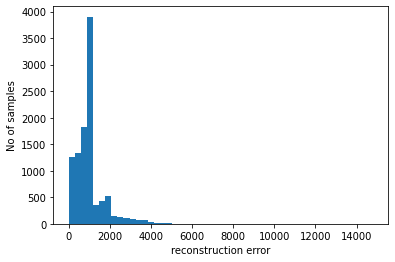

Reconstruction error threshold:  14797.75576313064


In [402]:
plt.hist(recons_error, bins=50)
plt.xlabel("reconstruction error")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
# threshold = np.max(recons_error)
# threshold =3000
print("Reconstruction error threshold: ", threshold)

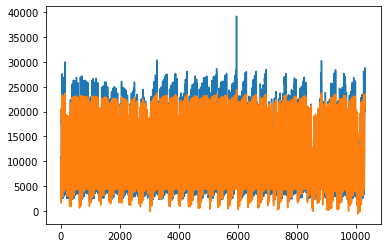

In [403]:
# Checking how the first sequence is learnt
plt.plot(x2)
plt.plot(xi)
plt.show()

In [404]:
recons_error.reshape(-1)

array([ 563.90873176, 1824.25144297, 1643.13021654, ..., 4064.73155183,
       3508.07834844, 3278.64154316])

In [457]:
def e_delta(error,percentile):
    t=percentile/100
    e = np.abs(error)
    etr = np.sort(error)
    idx= (np.floor(len(etr)*t)).astype(int)
    return etr[idx-1]



In [485]:
threshold = e_delta(recons_error,98)

anomalies = recons_error > threshold

data =pd.DataFrame(x2)
recons = pd.DataFrame(xi)

In [486]:
anomalous_data_indices = data.loc[anomalies].index

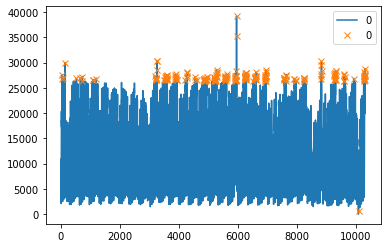

In [487]:
df_subset = data.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
data.plot(label='Normal', ax=ax)
df_subset.plot(label='anomaly', ax=ax, style ='x')
plt.legend()
plt.show()
